<a href="https://colab.research.google.com/github/RahulXavier/HEXA/blob/master/Siamese_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb
import random
import numpy as np
import keras
import wandb
from wandb.keras import WandbCallback
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Concatenate, Dot, Lambda, Input
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from google.colab import drive
import os
import cv2
from google.colab.patches import cv2_imshow   #cv2_imshow(x_train[1]) #To display images
from random import randint

In [ ]:
drive.mount('/content/drive')

In [ ]:
'''
    MAP

    1 - Reenu
    2 - Renie
    3 - Sandra F
    4 - Shoalia
    5 - Shwetha Sandeep
    6 - Sweta Satish
    7 - Tabita
    8 - Vivek SP

'''

In [ ]:
x_train = []
y_train = []
x_test = []
y_test = []
size = 64

directory = r'/content/drive/My Drive/Colab Notebooks/Project-Sign samples/Signature Datasets/Training/Reenu'
for filename in os.listdir(directory):
    file = '/content/drive/My Drive/Colab Notebooks/Project-Sign samples/Signature Datasets/Training/Reenu/' + filename
    im = cv2.imread(file,0)  # 0 for greyscale
    im = cv2.resize(im, dsize=(size, size), interpolation=cv2.INTER_CUBIC)
    x_train.append(im)
    y_train.append(1)
    value = randint(1,10)
    if value<4 :
        x_test.append(im)
        y_test.append(1)
print('1: Processed ;',end = ' ')
print(len(os.listdir(directory)),' images converted')

directory = r'/content/drive/My Drive/Colab Notebooks/Project-Sign samples/Signature Datasets/Training/Renie'
for filename in os.listdir(directory):
    file = '/content/drive/My Drive/Colab Notebooks/Project-Sign samples/Signature Datasets/Training/Renie/' + filename
    im = cv2.imread(file,0)  # 0 for greyscale
    im = cv2.resize(im, dsize=(size, size), interpolation=cv2.INTER_CUBIC)
    x_train.append(im)
    y_train.append(2)
    value = randint(1,10)
    if value<4 :
        x_test.append(im)
        y_test.append(2)
print('2: Processed ;',end = ' ')
print(len(os.listdir(directory)),' images converted')

directory = r'/content/drive/My Drive/Colab Notebooks/Project-Sign samples/Signature Datasets/Training/Sandra Fulgence'
for filename in os.listdir(directory):
    file = '/content/drive/My Drive/Colab Notebooks/Project-Sign samples/Signature Datasets/Training/Sandra Fulgence/' + filename
    im = cv2.imread(file,0)  # 0 for greyscale
    im = cv2.resize(im, dsize=(size, size), interpolation=cv2.INTER_CUBIC)
    x_train.append(im)
    y_train.append(3)
    value = randint(1,10)
    if value<4 :
        x_test.append(im)
        y_test.append(3)
print('3: Processed ;',end=' ')
print(len(os.listdir(directory)),' images converted')

directory = r'/content/drive/My Drive/Colab Notebooks/Project-Sign samples/Signature Datasets/Training/Shoalia'
for filename in os.listdir(directory):
    file = '/content/drive/My Drive/Colab Notebooks/Project-Sign samples/Signature Datasets/Training/Shoalia/' + filename
    im = cv2.imread(file,0)  # 0 for greyscale
    im = cv2.resize(im, dsize=(size, size), interpolation=cv2.INTER_CUBIC)
    x_train.append(im)
    y_train.append(4)
    value = randint(1,10)
    if value<4 :
        x_test.append(im)
        y_test.append(4)
print('4: Processed ;',end =' ')
print(len(os.listdir(directory)),' images converted')

directory = r'/content/drive/My Drive/Colab Notebooks/Project-Sign samples/Signature Datasets/Training/Shwetha Sandeep'
for filename in os.listdir(directory):
    file = '/content/drive/My Drive/Colab Notebooks/Project-Sign samples/Signature Datasets/Training/Shwetha Sandeep/' + filename
    im = cv2.imread(file,0)  # 0 for greyscale
    im = cv2.resize(im, dsize=(size, size), interpolation=cv2.INTER_CUBIC)
    x_train.append(im)
    y_train.append(5)
    value = randint(1,10)
    if value<4 :
        x_test.append(im)
        y_test.append(5)
print('5: Processed ;', end = ' ')
print(len(os.listdir(directory)),' images converted')

directory = r'/content/drive/My Drive/Colab Notebooks/Project-Sign samples/Signature Datasets/Training/Sweta Satish'
for filename in os.listdir(directory):
    file = '/content/drive/My Drive/Colab Notebooks/Project-Sign samples/Signature Datasets/Training/Sweta Satish/' + filename
    im = cv2.imread(file,0)  # 0 for greyscale
    im = cv2.resize(im, dsize=(size, size), interpolation=cv2.INTER_CUBIC)
    x_train.append(im)
    y_train.append(6)
    value = randint(1,10)
    if value<4 :
        x_test.append(im)
        y_test.append(6)
print('6: Processed ;',end = ' ')
print(len(os.listdir(directory)),' images converted')

directory = r'/content/drive/My Drive/Colab Notebooks/Project-Sign samples/Signature Datasets/Training/Tabitha'
for filename in os.listdir(directory):
    file = '/content/drive/My Drive/Colab Notebooks/Project-Sign samples/Signature Datasets/Training/Tabitha/' + filename
    im = cv2.imread(file,0)  # 0 for greyscale
    im = cv2.resize(im, dsize=(size, size), interpolation=cv2.INTER_CUBIC)
    x_train.append(im)
    y_train.append(7)
    value = randint(1,10)
    if value<4 :
        x_test.append(im)
        y_test.append(7)
print('7: Processed ;',end = ' ')
print(len(os.listdir(directory)),' images converted')

directory = r'/content/drive/My Drive/Colab Notebooks/Project-Sign samples/Signature Datasets/Training/Vivek SP'
for filename in os.listdir(directory):
    file = '/content/drive/My Drive/Colab Notebooks/Project-Sign samples/Signature Datasets/Training/Vivek SP/' + filename
    im = cv2.imread(file,0)  # 0 for greyscale
    im = cv2.resize(im, dsize=(size, size), interpolation=cv2.INTER_CUBIC)
    x_train.append(im)
    y_train.append(8)
    value = randint(1,10)
    if value<4 :
        x_test.append(im)
        y_test.append(8)
print('8: Processed ;',end = ' ')
print(len(os.listdir(directory)),' images converted')

print('Length of dataset: ',len(x_train))

from numpy import save
save('/content/drive/My Drive/Colab Notebooks/SNN data/x_train.npy', x_train)
save('/content/drive/My Drive/Colab Notebooks/SNN data/y_train.npy', y_train)
save('/content/drive/My Drive/Colab Notebooks/SNN data/x_test.npy', x_test)
save('/content/drive/My Drive/Colab Notebooks/SNN data/y_test.npy', y_test)

1: Processed ; 87  images converted
2: Processed ; 87  images converted
3: Processed ; 87  images converted
4: Processed ; 87  images converted
5: Processed ; 87  images converted
6: Processed ; 87  images converted
7: Processed ; 87  images converted
8: Processed ; 87  images converted
Length of dataset:  696


In [ ]:
from numpy import load
x_train = load('/content/drive/My Drive/Colab Notebooks/SNN data/x_train.npy')
y_train = load('/content/drive/My Drive/Colab Notebooks/SNN data/y_train.npy')
x_test = load('/content/drive/My Drive/Colab Notebooks/SNN data/x_test.npy')
y_test = load('/content/drive/My Drive/Colab Notebooks/SNN data/y_test.npy')

In [ ]:
#Visulaize dataset
cv2_imshow(x_train[300])
print(x_train[300])

In [ ]:
#Normalising the pixels
x_train = np.true_divide(x_train,255)
x_test = np.true_divide(x_test,255)

In [ ]:
'''
    MAP

    1 - Reenu - [0:86]
    2 - Renie - [87:173]
    3 - Sandra F - [174:260]
    4 - Shoalia - [261:347]
    5 - Shwetha Sandeep - [348:434]
    6 - Sweta Satish - [435:521]
    7 - Tabita - [522:608]
    8 - Vivek SP - [609:695]

'''
#print(y_train[695])
print('Resolution is: ',len(x_train[1]))

Resolution is:  64


In [ ]:
pairs_train = []
labels_train = []

# Adding 2 matching & 7 unmatching image-pairs for each image
# So (2+7)*87*8 = 6264 pairs in dataset
# Label : 1-Match ; 0-Unmatch

for i in range(0,87):            #1 - Reenu - [0:86]
    source_img = x_train[i]
    matching_img_1 = x_train[randint(0,86)]
    matching_img_2 = x_train[randint(0,86)]
    unmatch_img_2 = x_train[randint(87,173)]
    unmatch_img_3 = x_train[randint(174,260)]
    unmatch_img_4 = x_train[randint(261,347)]
    unmatch_img_5 = x_train[randint(348,434)]
    unmatch_img_6 = x_train[randint(435,521)]
    unmatch_img_7 = x_train[randint(522,608)]
    unmatch_img_8 = x_train[randint(609,695)]
    pairs_train.extend([[source_img,matching_img_1],
                  [source_img,matching_img_2],
                  [source_img,unmatch_img_2],
                  [source_img,unmatch_img_3],
                  [source_img,unmatch_img_4],
                  [source_img,unmatch_img_5],
                  [source_img,unmatch_img_6],
                  [source_img,unmatch_img_7],
                  [source_img,unmatch_img_8]])
    labels_train.extend([1,1,0,0,0,0,0,0,0])
print('Progress: ',len(pairs_train),'/6264')

for i in range(87,174):         #2 - Renie - [87:173]
    source_img = x_train[i]
    matching_img_1 = x_train[randint(87,173)]
    matching_img_2 = x_train[randint(87,173)]
    unmatch_img_1 = x_train[randint(0,86)]
    unmatch_img_3 = x_train[randint(174,260)]
    unmatch_img_4 = x_train[randint(261,347)]
    unmatch_img_5 = x_train[randint(348,434)]
    unmatch_img_6 = x_train[randint(435,521)]
    unmatch_img_7 = x_train[randint(522,608)]
    unmatch_img_8 = x_train[randint(609,695)]
    pairs_train.extend([[source_img,matching_img_1],
                  [source_img,matching_img_2],
                  [source_img,unmatch_img_1],
                  [source_img,unmatch_img_3],
                  [source_img,unmatch_img_4],
                  [source_img,unmatch_img_5],
                  [source_img,unmatch_img_6],
                  [source_img,unmatch_img_7],
                  [source_img,unmatch_img_8]])
    labels_train.extend([1,1,0,0,0,0,0,0,0])
print('Progress: ',len(pairs_train),'/6264')

for i in range(174,261):       #3 - Sandra F - [174:260]
    source_img = x_train[i]
    matching_img_1 = x_train[randint(174,260)]
    matching_img_2 = x_train[randint(174,260)]
    unmatch_img_1 = x_train[randint(0,86)]
    unmatch_img_2 = x_train[randint(87,173)]
    unmatch_img_4 = x_train[randint(261,347)]
    unmatch_img_5 = x_train[randint(348,434)]
    unmatch_img_6 = x_train[randint(435,521)]
    unmatch_img_7 = x_train[randint(522,608)]
    unmatch_img_8 = x_train[randint(609,695)]
    pairs_train.extend([[source_img,matching_img_1],
                  [source_img,matching_img_2],
                  [source_img,unmatch_img_1],
                  [source_img,unmatch_img_2],
                  [source_img,unmatch_img_4],
                  [source_img,unmatch_img_5],
                  [source_img,unmatch_img_6],
                  [source_img,unmatch_img_7],
                  [source_img,unmatch_img_8]])
    labels_train.extend([1,1,0,0,0,0,0,0,0])
print('Progress: ',len(pairs_train),'/6264')

for i in range(261,348):       #4 - Shoalia - [261:347]
    source_img = x_train[i]
    matching_img_1 = x_train[randint(261,347)]
    matching_img_2 = x_train[randint(261,347)]
    unmatch_img_1 = x_train[randint(0,86)]
    unmatch_img_2 = x_train[randint(87,173)]
    unmatch_img_3 = x_train[randint(174,260)]
    unmatch_img_5 = x_train[randint(348,434)]
    unmatch_img_6 = x_train[randint(435,521)]
    unmatch_img_7 = x_train[randint(522,608)]
    unmatch_img_8 = x_train[randint(609,695)]
    pairs_train.extend([[source_img,matching_img_1],
                  [source_img,matching_img_2],
                  [source_img,unmatch_img_1],
                  [source_img,unmatch_img_2],
                  [source_img,unmatch_img_3],
                  [source_img,unmatch_img_5],
                  [source_img,unmatch_img_6],
                  [source_img,unmatch_img_7],
                  [source_img,unmatch_img_8]])
    labels_train.extend([1,1,0,0,0,0,0,0,0])
print('Progress: ',len(pairs_train),'/6264')

for i in range(348,435):       #5 - Shwetha Sandeep - [348:434]
    source_img = x_train[i]
    matching_img_1 = x_train[randint(348,434)]
    matching_img_2 = x_train[randint(348,434)]
    unmatch_img_1 = x_train[randint(0,86)]
    unmatch_img_2 = x_train[randint(87,173)]
    unmatch_img_3 = x_train[randint(174,260)]
    unmatch_img_4 = x_train[randint(261,347)]
    unmatch_img_6 = x_train[randint(435,521)]
    unmatch_img_7 = x_train[randint(522,608)]
    unmatch_img_8 = x_train[randint(609,695)]
    pairs_train.extend([[source_img,matching_img_1],
                  [source_img,matching_img_2],
                  [source_img,unmatch_img_1],
                  [source_img,unmatch_img_2],
                  [source_img,unmatch_img_3],
                  [source_img,unmatch_img_4],
                  [source_img,unmatch_img_6],
                  [source_img,unmatch_img_7],
                  [source_img,unmatch_img_8]])
    labels_train.extend([1,1,0,0,0,0,0,0,0])
print('Progress: ',len(pairs_train),'/6264')

for i in range(435,522):       #6 - Sweta Satish - [435:521]
    source_img = x_train[i]
    matching_img_1 = x_train[randint(435,521)]
    matching_img_2 = x_train[randint(435,521)]
    unmatch_img_1 = x_train[randint(0,86)]
    unmatch_img_2 = x_train[randint(87,173)]
    unmatch_img_3 = x_train[randint(174,260)]
    unmatch_img_4 = x_train[randint(261,347)]
    unmatch_img_5 = x_train[randint(348,434)]
    unmatch_img_7 = x_train[randint(522,608)]
    unmatch_img_8 = x_train[randint(609,695)]
    pairs_train.extend([[source_img,matching_img_1],
                  [source_img,matching_img_2],
                  [source_img,unmatch_img_1],
                  [source_img,unmatch_img_2],
                  [source_img,unmatch_img_3],
                  [source_img,unmatch_img_4],
                  [source_img,unmatch_img_5],
                  [source_img,unmatch_img_7],
                  [source_img,unmatch_img_8]])
    labels_train.extend([1,1,0,0,0,0,0,0,0])
print('Progress: ',len(pairs_train),'/6264')

for i in range(522,609):       #7 - Tabita - [522:608]
    source_img = x_train[i]
    matching_img_1 = x_train[randint(522,608)]
    matching_img_2 = x_train[randint(522,608)]
    unmatch_img_1 = x_train[randint(0,86)]
    unmatch_img_2 = x_train[randint(87,173)]
    unmatch_img_3 = x_train[randint(174,260)]
    unmatch_img_4 = x_train[randint(261,347)]
    unmatch_img_5 = x_train[randint(348,434)]
    unmatch_img_6 = x_train[randint(435,521)]
    unmatch_img_8 = x_train[randint(609,695)]
    pairs_train.extend([[source_img,matching_img_1],
                  [source_img,matching_img_2],
                  [source_img,unmatch_img_1],
                  [source_img,unmatch_img_2],
                  [source_img,unmatch_img_3],
                  [source_img,unmatch_img_4],
                  [source_img,unmatch_img_5],
                  [source_img,unmatch_img_6],
                  [source_img,unmatch_img_8]])
    labels_train.extend([1,1,0,0,0,0,0,0,0])
print('Progress: ',len(pairs_train),'/6264')

for i in range(609,696):       #8 - Vivek SP - [609:695]
    source_img = x_train[i]
    matching_img_1 = x_train[randint(609,695)]
    matching_img_2 = x_train[randint(609,695)]
    unmatch_img_1 = x_train[randint(0,86)]
    unmatch_img_2 = x_train[randint(87,173)]
    unmatch_img_3 = x_train[randint(174,260)]
    unmatch_img_4 = x_train[randint(261,347)]
    unmatch_img_5 = x_train[randint(348,434)]
    unmatch_img_6 = x_train[randint(435,521)]
    unmatch_img_7 = x_train[randint(522,608)]
    pairs_train.extend([[source_img,matching_img_1],
                  [source_img,matching_img_2],
                  [source_img,unmatch_img_1],
                  [source_img,unmatch_img_2],
                  [source_img,unmatch_img_3],
                  [source_img,unmatch_img_4],
                  [source_img,unmatch_img_5],
                  [source_img,unmatch_img_6],
                  [source_img,unmatch_img_8]])
    labels_train.extend([1,1,0,0,0,0,0,0,0])
print('Progress: ',len(pairs_train),'/6264')

Progress:  783 /6264
Progress:  1566 /6264
Progress:  2349 /6264
Progress:  3132 /6264
Progress:  3915 /6264
Progress:  4698 /6264
Progress:  5481 /6264
Progress:  6264 /6264


In [ ]:
pairs_test = []
labels_test = []

# Adding 1 matching & 1 unmatching image-pairs for each image
# So (2)*87*8 = 1392 pairs in dataset
# Label : 1-Match ; 0-Unmatch

for i in range(0,87):            #1 - Reenu - [0:86]
    source_img = x_train[i]
    matching_img_1 = x_train[randint(0,86)]
    unmatch_img_1 = x_train[randint(87,695)]
    pairs_test.extend([[source_img,matching_img_1],
                  [source_img,unmatch_img_1]])
    labels_test.extend([1,0])
print('Progress: ',len(pairs_test),'/1392')

for i in range(87,174):            #2 - Renie - [87:173]
    source_img = x_train[i]
    matching_img_1 = x_train[randint(87,173)]
    unmatch_img_1 = x_train[randint(174,695)]
    pairs_test.extend([[source_img,matching_img_1],
                  [source_img,unmatch_img_1]])
    labels_test.extend([1,0])
print('Progress: ',len(pairs_test),'/1392')

for i in range(174,261):            #3 - Sandra F - [174:260]
    source_img = x_train[i]
    matching_img_1 = x_train[randint(174,260)]
    unmatch_img_1 = x_train[randint(261,695)]
    pairs_test.extend([[source_img,matching_img_1],
                  [source_img,unmatch_img_1]])
    labels_test.extend([1,0])
print('Progress: ',len(pairs_test),'/1392')

for i in range(261,348):            #4 - Shoalia - [261:347]
    source_img = x_train[i]
    matching_img_1 = x_train[randint(261,347)]
    unmatch_img_1 = x_train[randint(348,695)]
    pairs_test.extend([[source_img,matching_img_1],
                  [source_img,unmatch_img_1]])
    labels_test.extend([1,0])
print('Progress: ',len(pairs_test),'/1392')

for i in range(348,435):            #5 - Shwetha Sandeep - [348:434]
    source_img = x_train[i]
    matching_img_1 = x_train[randint(348,434)]
    unmatch_img_1 = x_train[randint(435,695)]
    pairs_test.extend([[source_img,matching_img_1],
                  [source_img,unmatch_img_1]])
    labels_test.extend([1,0])
print('Progress: ',len(pairs_test),'/1392')

for i in range(435,522):            #6 - Sweta Satish - [435:521]
    source_img = x_train[i]
    matching_img_1 = x_train[randint(435,521)]
    unmatch_img_1 = x_train[randint(0,434)]
    pairs_test.extend([[source_img,matching_img_1],
                  [source_img,unmatch_img_1]])
    labels_test.extend([1,0])
print('Progress: ',len(pairs_test),'/1392')

for i in range(522,609):            #7 - Tabita - [522:608]
    source_img = x_train[i]
    matching_img_1 = x_train[randint(522,608)]
    unmatch_img_1 = x_train[randint(0,521)]
    pairs_test.extend([[source_img,matching_img_1],
                  [source_img,unmatch_img_1]])
    labels_test.extend([1,0])
print('Progress: ',len(pairs_test),'/1392')

for i in range(609,696):            #8 - Vivek SP - [609:695]
    source_img = x_train[i]
    matching_img_1 = x_train[randint(609,695)]
    unmatch_img_1 = x_train[randint(0,608)]
    pairs_test.extend([[source_img,matching_img_1],
                  [source_img,unmatch_img_1]])
    labels_test.extend([1,0])
print('Progress: ',len(pairs_test),'/1392')

Progress:  174 /1392
Progress:  348 /1392
Progress:  522 /1392
Progress:  696 /1392
Progress:  870 /1392
Progress:  1044 /1392
Progress:  1218 /1392
Progress:  1392 /1392


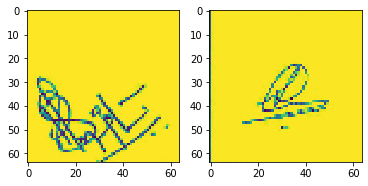

0


In [ ]:
# Dataset visualizer
#num = int(input('Enter value between 0 & 6263: '))
num = 50
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(pairs_train[num][0])
f.add_subplot(1,2, 2)
plt.imshow(pairs_train[num][1])
plt.show(block=True)
print(labels_train[num])

In [ ]:
#Convert labels to Numpy array
print('The label is in list format: ',type(labels_train),labels_train[1:20])
labels_train = np.asarray(labels_train)
print('The labels are now in :', type(labels_train),labels_train[1:20])

print('The label is in list format: ',type(labels_test),labels_test[1:20])
labels_test = np.asarray(labels_test)
print('The labels are now in :', type(labels_test),labels_test[1:20])

#Convert pairs to numpy array
pairs_train = np.asarray(pairs_train)
print(type(pairs_train))
pairs_test = np.asarray(pairs_test)
print(type(pairs_test))

The label is in list format:  <class 'list'> [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
The labels are now in : <class 'numpy.ndarray'> [1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1]
The label is in list format:  <class 'list'> [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
The labels are now in : <class 'numpy.ndarray'> [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
from keras import backend as K

def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


input = Input((64,64))
x = Flatten()(input)
x = Dense(128, activation='relu')(x) #128
dense = Model(input, x)

input1 = Input((64,64))
input2 = Input((64,64))

dense1 = dense(input1)
dense2 = dense(input2)

merge_layer = Lambda(euclidean_distance)([dense1,dense2])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[input1, input2], outputs=dense_layer)

In [ ]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           (None, 64, 64)       0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           (None, 64, 64)       0                                            
__________________________________________________________________________________________________
model_9 (Model)                 (None, 256)          1048832     input_14[0][0]                   
                                                                 input_15[0][0]                   
__________________________________________________________________________________________________
lambda_5 (Lambda)               (None, 1)            0           model_9[1][0]             

In [ ]:
# Training
wandb.init(project="siamese")
model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:],
          batch_size=16,
          validation_data = ([pairs_test[:,0], pairs_test[:,1]],labels_test[:]),
          epochs= 20,
          callbacks=[WandbCallback()])

In [ ]:
os.chdir("/content/drive/My Drive/Colab Notebooks/SNN data/")
model.save('SNN_model.h5py')

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/Colab Notebooks/SNN data/SNN_model.h5py')

In [ ]:
# Predicting output
size = 64

#Image1
file = '/content/drive/My Drive/Colab Notebooks/Project-Sign samples/Input images/5.jpg'
test_im1 = cv2.imread(file,0)  # 0 for greyscale
plot1 = test_im1
test_im1 = cv2.resize(test_im1, dsize=(size, size), interpolation=cv2.INTER_CUBIC)

#Image2
file = '/content/drive/My Drive/Colab Notebooks/Project-Sign samples/Input images/9.jpg'
test_im2 = cv2.imread(file,0)  # 0 for greyscale
plot2 = test_im2
test_im2 = cv2.resize(test_im2, dsize=(size, size), interpolation=cv2.INTER_CUBIC)

#Plotting
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(plot1)
f.add_subplot(1,2, 2)
plt.imshow(plot2)
plt.show(block=True)

test_im1 = np.true_divide(test_im1,255)
test_im1 = np.asarray(test_im1)
test_im2 = np.true_divide(test_im2,255)
test_im2 = np.asarray(test_im2)

result = model.predict([[test_im1],[test_im2]],steps=None)
print(result)

In [ ]:
#To crop white spaces
file = '/content/drive/My Drive/Colab Notebooks/Project-Sign samples/Input images/6.jpg'
im = cv2.imread(file,0)
im = cv2.resize(im, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)
im = np.asarray(im)
# Mask of non-black pixels (assuming image has a single channel).
mask = im < 255

# Coordinates of non-black pixels.
coords = np.argwhere(mask)

# Bounding box of non-black pixels.
x0, y0 = coords.min(axis=0)
x1, y1 = coords.max(axis=0) + 1   # slices are exclusive at the top

# Get the contents of the bounding box.
cropped = im[x0:x1,y0:y1]

f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(im)
f.add_subplot(1,2, 2)
plt.imshow(cropped)
plt.show(block=True)